# Autoencoders
#### Take high-dimension data, such as images, compress them down to a lower dimension representation (with an encoder), then attempt to reconstruct the image (with a decoder)
This tasks the model to find weights that efficiently (through finding patterns in the data) represent data in such a manner that it can effectively compress and reconstruct the data

In [1]:
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")
    
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, MaxPool2D, Dropout, Flatten, Reshape, Conv2DTranspose
from tensorflow.keras import models
from sklearn.datasets import load_digits
from sklearn.metrics import mean_squared_error
%matplotlib inline

### Load data and view the first image & label

In [2]:
data = load_digits()
X_train = data.images[:1500] / 16
y_train = data.target[:1500]
X_test = data.images[1500:] / 16
y_test = data.target[1500:]

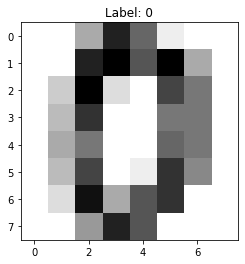

In [3]:
plt.imshow(X_train[0], cmap=plt.cm.gray_r, interpolation='nearest')
plt.title('Label: ' + str(y_train[0]))
plt.show()

In [4]:
data.images[0].shape

(8, 8)

### Define Autoencoder model using Dense layers

In [5]:
model = Sequential()
model.add(Flatten(input_shape = (8, 8)))
model.add(Dense(10, activation='relu'))
model.add(Dense(64, activation='linear'))
model.add(Reshape(target_shape=(8,8)))
model.compile('adam', loss='mse')

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 10)                650       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                704       
_________________________________________________________________
reshape (Reshape)            (None, 8, 8)              0         
Total params: 1,354
Trainable params: 1,354
Non-trainable params: 0
_________________________________________________________________


In [7]:
history = model.fit(X_train, X_train, batch_size=64, epochs=128, verbose=0, validation_split=0.1)

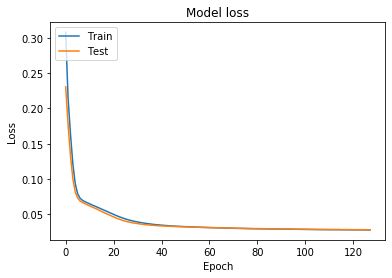

In [8]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [9]:
pred_X_test = model.predict(X_test)

### Plot some example reconstructions

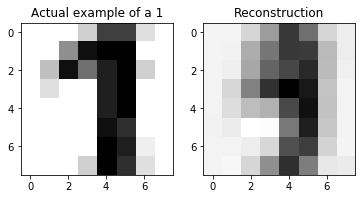

Reconstruction MSE for the above example was: 0.04120797334714936


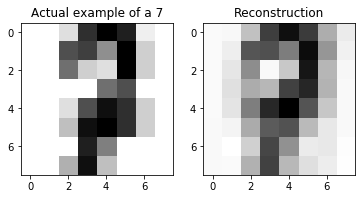

Reconstruction MSE for the above example was: 0.02188567303304528


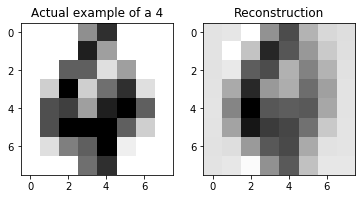

Reconstruction MSE for the above example was: 0.026701861805116


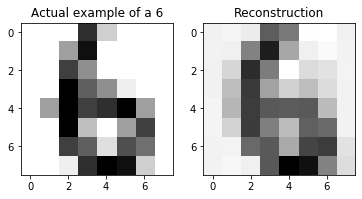

Reconstruction MSE for the above example was: 0.02113174117736951


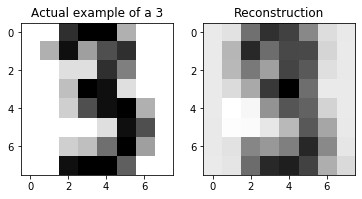

Reconstruction MSE for the above example was: 0.027275389703037035


In [10]:
for i in range(5):
    fig, axs = plt.subplots(1, 2)
    # actual test example
    axs[0].imshow(X_test[i], cmap=plt.cm.gray_r, interpolation='nearest')
    axs[0].title.set_text('Actual example of a ' + str(y_test[i]))
    
    # predicted test example
    axs[1].imshow(pred_X_test[i].reshape((8, 8)), cmap=plt.cm.gray_r, interpolation='nearest')
    axs[1].title.set_text('Reconstruction')
    plt.show()
    
    print('Reconstruction MSE for the above example was:', 
          mean_squared_error(
              X_test[i].reshape((8, 8)),
              pred_X_test[i].reshape((8, 8))
          )
    )

### Now create another autoencoder, but use convolutional and max pooling layers

In [11]:
# examples are currently 8x8 = 64 data points
model = Sequential()
model.add(Conv2D(filters=4, kernel_size=(4,4), padding='valid', activation='relu', input_shape = (8, 8, 1)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2DTranspose(filters=1, kernel_size=(7,7), activation='linear'))
model.compile('adam', loss='mse')

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 5, 5, 4)           68        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 2, 2, 4)           0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 8, 8, 1)           197       
Total params: 265
Trainable params: 265
Non-trainable params: 0
_________________________________________________________________


In [13]:
history = model.fit(X_train.reshape(-1,8,8,1), X_train.reshape(-1,8,8,1), batch_size=64, epochs=256, verbose=0, validation_split=0.1)

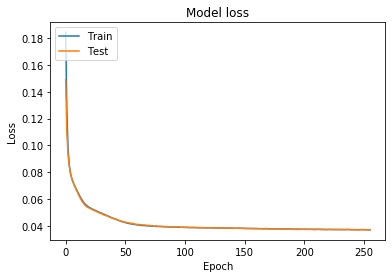

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [15]:
pred_X_test = model.predict(X_test.reshape(-1, 8, 8, 1))

### Plot some example reconstructions

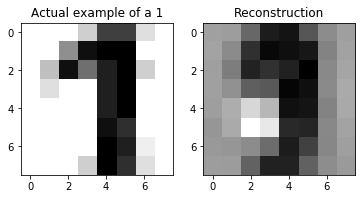

Reconstruction MSE for the above example was: 0.046336351459152034


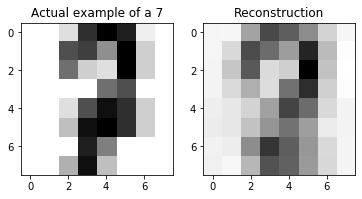

Reconstruction MSE for the above example was: 0.037050321074726694


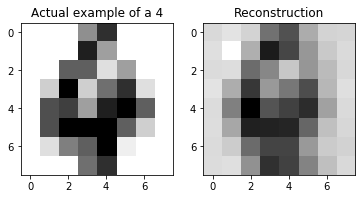

Reconstruction MSE for the above example was: 0.027891120112773567


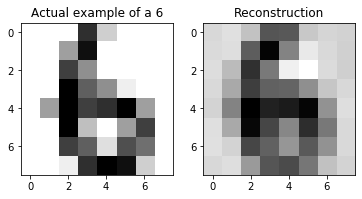

Reconstruction MSE for the above example was: 0.03065581398703962


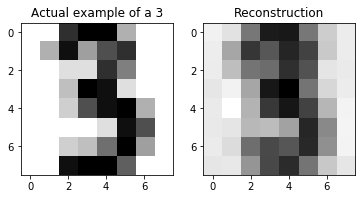

Reconstruction MSE for the above example was: 0.03545433177786106


In [16]:
for i in range(5):
    fig, axs = plt.subplots(1, 2)
    # actual test example
    axs[0].imshow(X_test[i], cmap=plt.cm.gray_r, interpolation='nearest')
    axs[0].title.set_text('Actual example of a ' + str(y_test[i]))
    
    # predicted test example
    axs[1].imshow(pred_X_test[i].reshape((8, 8)), cmap=plt.cm.gray_r, interpolation='nearest')
    axs[1].title.set_text('Reconstruction')
    plt.show()
    
    print('Reconstruction MSE for the above example was:', 
          mean_squared_error(
              X_test[i].reshape((8, 8)),
              pred_X_test[i].reshape((8, 8))
          )
    )

## View outputs of the hidden layers

In [17]:
n_layers = 2
layer_outputs = [layer.output for layer in model.layers[:n_layers]]
activation_model = models.Model(
    inputs = model.input,
    outputs=layer_outputs
)

In [18]:
activations = activation_model.predict(X_test.reshape(-1, 8, 8, 1))

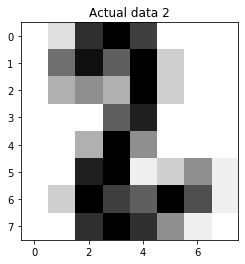


Output of the convolutional layer:



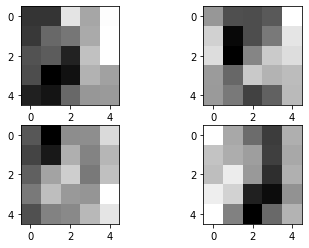


Output of the max pooling layer:



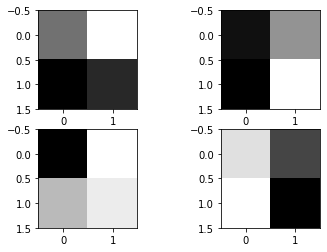

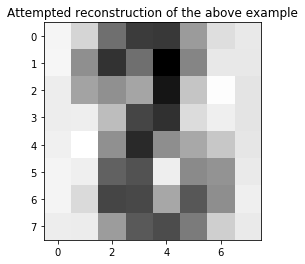

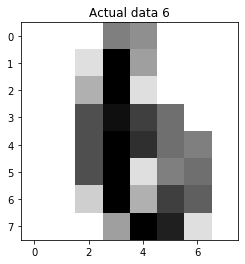


Output of the convolutional layer:



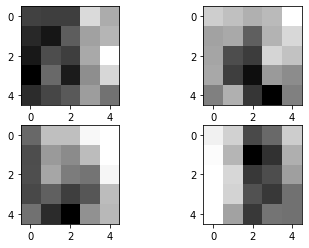


Output of the max pooling layer:



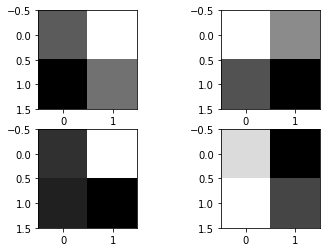

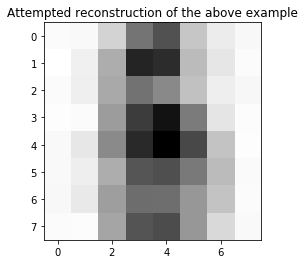

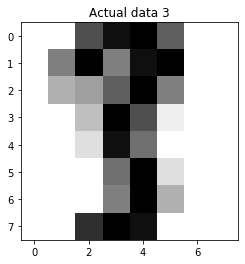


Output of the convolutional layer:



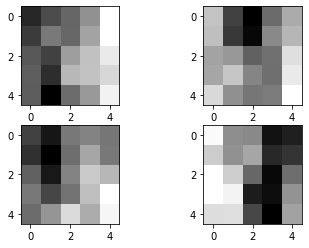


Output of the max pooling layer:



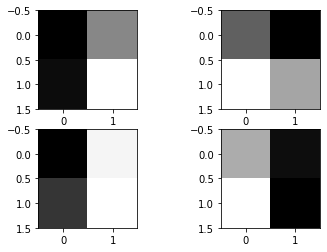

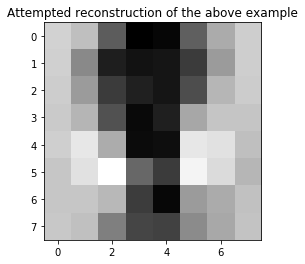

In [19]:
for i in range(100, 103):
    plt.imshow(X_test[i], cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Actual data ' + str(y_test[i]))
    plt.show()
    
    print('\nOutput of the convolutional layer:\n')
    fig, axs = plt.subplots(2, 2)
    axs[0,0].imshow(activations[0][i,:,:,0].reshape(5,5), cmap=plt.cm.gray_r, interpolation='nearest')
    axs[0,1].imshow(activations[0][i,:,:,1].reshape(5,5), cmap=plt.cm.gray_r, interpolation='nearest')
    axs[1,0].imshow(activations[0][i,:,:,2].reshape(5,5), cmap=plt.cm.gray_r, interpolation='nearest')
    axs[1,1].imshow(activations[0][i,:,:,3].reshape(5,5), cmap=plt.cm.gray_r, interpolation='nearest')
    plt.show()
    
    print('\nOutput of the max pooling layer:\n')
    fig, axs = plt.subplots(2, 2)
    axs[0,0].imshow(activations[1][i,:,:,0].reshape(2,2), cmap=plt.cm.gray_r, interpolation='nearest')
    axs[0,1].imshow(activations[1][i,:,:,1].reshape(2,2), cmap=plt.cm.gray_r, interpolation='nearest')
    axs[1,0].imshow(activations[1][i,:,:,2].reshape(2,2), cmap=plt.cm.gray_r, interpolation='nearest')
    axs[1,1].imshow(activations[1][i,:,:,3].reshape(2,2), cmap=plt.cm.gray_r, interpolation='nearest')
    plt.show()
    
    # predicted test example
    plt.imshow(pred_X_test[i].reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Attempted reconstruction of the above example')
    plt.show()